<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Project <br>
<font color=696880 size=4>
    Project Team 
    
    
____


### Full Name : MohammadMehdi Zare , Mohammad Ali Olama
### Student Number : 98100431 , 98100497
___

# Introduction

In this project, we are going to have a brief and elementary hands-on real-world project, predicting breast cancer survival using machine learning models with clinical data and gene expression profiles.

# Data Documentation

For this purpose, we will use "Breast Cancer Gene Expression Profiles (METABRIC)" data. 
The first 31 columns of data contain clinical information including death status.
The next columns of the data contain gene's related information which includes both gene expressions and mutation information. (gene's mutation info columns have been marked with "_mut" at the end of the names of the columns) 
For more information please read the [data documentation](https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric).

# Data Preparation (15 Points)

In this section you must first split data into three datasets:
<br>
1- clinical dataset
<br>
2- gene expressions dataset
<br>
3- gene mutation dataset. (We will not use this dataset in further steps of the project)

## Data Loading & Splitting

In [1]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
## imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from colorama import Fore
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing




# 
plt.style.use('ggplot')
# rcParams['figure.figsize'] = (12, 6)

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml-project/METABRIC_RNA_Mutation.csv')
df.drop(columns = ['death_from_cancer'] , inplace=True)
df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0              0             75.65             MASTECTOMY  Breast Cancer   
1              2             43.19      BREAST CONSERVING  Breast Cancer   
2              5             48.87             MASTECTOMY  Breast Cancer   
3              6             47.68             MASTECTOMY  Breast Cancer   
4              8             76.97             MASTECTOMY  Breast Cancer   
...          ...               ...                    ...            ...   
1899        7295             43.10      BREAST CONSERVING  Breast Cancer   
1900        7296             42.88             MASTECTOMY  Breast Cancer   
1901        7297             62.90             MASTECTOMY  Breast Cancer   
1902        7298             61.16             MASTECTOMY  Breast Cancer   
1903        7299             60.02      BREAST CONSERVING  Breast Cancer   

                           cancer_type_detailed cellularity  chemotherapy  \
0              Breast Invasive Ductal Carcinoma         NaN             0   
1              Breast Invasive Ductal Carcinoma        High             0   
2              Breast Invasive Ductal Carcinoma        High             1   
3     Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4     Breast Mixed Ductal and Lobular Carcinoma        High             1   
...                                         ...         ...           ...   
1899          Breast Invasive Lobular Carcinoma        High             0   
1900           Breast Invasive Ductal Carcinoma        High             0   
1901           Breast Invasive Ductal Carcinoma        High             0   
1902           Breast Invasive Ductal Carcinoma    Moderate             0   
1903           Breast Invasive Ductal Carcinoma        High             0   

     pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ...  \
0                    claudin-low     1.0                   Positve  ...   
1                           LumA     1.0                   Positve  ...   
2                           LumB     1.0                   Positve  ...   
3                           LumB     1.0                   Positve  ...   
4                           LumB     1.0                   Positve  ...   
...                          ...     ...                       ...  ...   
1899                        LumA     4.0                   Positve  ...   
1900                        LumB     4.0                   Positve  ...   
1901                        LumB     4.0                   Positve  ...   
1902                        LumB     4.0                   Positve  ...   
1903                        LumB     4.0                   Positve  ...   

     mtap_mut  ppp2cb_mut smarcd1_mut nras_mut ndfip1_mut  hras_mut prps2_mut  \
0           0           0           0        0          0         0         0   
1           0           0           0        0          0         0         0   
2           0           0           0        0          0         0         0   
3           0           0           0        0          0         0         0   
4           0           0           0        0          0         0         0   
...       ...         ...         ...      ...        ...       ...       ...   
1899        0           0           0        0          0         0         0   
1900        0           0           0        0          0         0         0   
1901        0           0           0        0          0         0         0   
1902        0           0           0        0          0         0         0   
1903        0           0           0        0          0         0         0   

     smarcb1_mut stmn2_mut  siah1_mut  
0              0         0          0  
1              0         0          0  
2              0         0          0  
3              0         0          0  
4              0         0          0  
...          ...       ...        ...  
1899          

In [5]:
pd.set_option('display.max_rows',None)
print(Fore.LIGHTRED_EX + 'Count of NaN cells in each column of dataframe is:' + Fore.RESET)
print(df.isna().sum())
print(Fore.LIGHTRED_EX + 'Total number of NaN cells in dataframe is:' + Fore.RESET)
print(df.isna().sum().sum())
print( '\n' ,  Fore.LIGHTBLUE_EX + 100 * "-" + Fore.RESET )
pd.set_option('display.max_rows',10)
df.dropna(inplace = True)
print(Fore.LIGHTRED_EX + 'Removing all NaN cells....' + Fore.RESET)
print(Fore.LIGHTRED_EX + 'Total number of NaN cells in dataframe is:' + Fore.RESET)
print(df.isna().sum().sum())



Count of NaN cells in each column of dataframe is:
patient_id                          0
age_at_diagnosis                    0
type_of_breast_surgery             22
cancer_type                         0
cancer_type_detailed               15
cellularity                        54
chemotherapy                        0
pam50_+_claudin-low_subtype         0
cohort                              0
er_status_measured_by_ihc          30
er_status                           0
neoplasm_histologic_grade          72
her2_status_measured_by_snp6        0
her2_status                         0
tumor_other_histologic_subtype     15
hormone_therapy                     0
inferred_menopausal_state           0
integrative_cluster                 0
primary_tumor_laterality          106
lymph_nodes_examined_positive       0
mutation_count                     45
nottingham_prognostic_index         0
oncotree_code                      15
overall_survival_months             0
overall_survival                    0

In [6]:
clinical_df = df.iloc[: , 0:30].copy() # clinical attributes
drop_cols = ['patient_id','cancer_type','er_status_measured_by_ihc','her2_status_measured_by_snp6' , 'overall_survival'] #reduncancy and high cardinality
clinical_df.drop(columns = drop_cols, inplace = True)

clinical_df

age_at_diagnosis type_of_breast_surgery  \
1                43.19      BREAST CONSERVING   
4                76.97             MASTECTOMY   
5                78.77             MASTECTOMY   
8                86.41      BREAST CONSERVING   
9                84.22             MASTECTOMY   
...                ...                    ...   
1618             71.22             MASTECTOMY   
1619             70.65      BREAST CONSERVING   
1621             75.62             MASTECTOMY   
1623             52.84      BREAST CONSERVING   
1664             63.20      BREAST CONSERVING   

                           cancer_type_detailed cellularity  chemotherapy  \
1              Breast Invasive Ductal Carcinoma        High             0   
4     Breast Mixed Ductal and Lobular Carcinoma        High             1   
5              Breast Invasive Ductal Carcinoma    Moderate             0   
8              Breast Invasive Ductal Carcinoma    Moderate             0   
9             Breast Invasive Lobular Carcinoma        High             0   
...                                         ...         ...           ...   
1618  Breast Mixed Ductal and Lobular Carcinoma        High             0   
1619  Breast Mixed Ductal and Lobular Carcinoma        High             0   
1621           Breast Invasive Ductal Carcinoma        High             0   
1623  Breast Mixed Ductal and Lobular Carcinoma        High             1   
1664   Breast Invasive Mixed Mucinous Carcinoma        High             0   

     pam50_+_claudin-low_subtype  cohort er_status  neoplasm_histologic_grade  \
1                           LumA     1.0  Positive                        3.0   
4                           LumB     1.0  Positive                        3.0   
5                           LumB     1.0  Positive                        3.0   
8                           LumB     1.0  Positive                        3.0   
9                           Her2     1.0  Positive                        2.0   
...                          ...     ...       ...                        ...   
1618                        LumA     5.0  Positive                        2.0   
1619                        LumB     5.0  Positive                        1.0   
1621                       Basal     5.0  Negative                        3.0   
1623                      Normal     5.0  Positive                        2.0   
1664                        LumB     5.0  Positive                        2.0   

     her2_status  ... lymph_nodes_examined_positive  mutation_count  \
1       Negative  ...                           0.0             2.0   
4       Negative  ...                           8.0             2.0   
5       Negative  ...                           0.0             4.0   
8       Negative  ...                           1.0             4.0   
9       Negative  ...                           0.0             5.0   
...          ...  ...                           ...             ...   
1618    Negative  ...                           4.0            11.0   
1619    Negative  ...                           0.0             9.0   
1621    Negative  ...                           0.0             4.0   
1623    Negative  ...                           6.0             5.0   
1664    Negative  ...                           0.0             3.0   

     nottingham_prognostic_index oncotree_code overall_survival_months  \
1                          4.020           IDC               84.633333   
4                          6.080          MDLC               41.366667   
5                          4.062           IDC                7.800000   
8                          5.032           IDC               36.566667   
9                          3.056           ILC               36.266667   
...                          ...           ...                     ...   
1618                       5.060          MDLC               85.000000   
1619                       2.040          MDLC              201.166667   


In [7]:
mutation_df = df.iloc[:,df.columns.str.endswith('_mut')].copy()

expression_df = df.iloc[: , 30:].copy()

cols = [c for c in expression_df.columns if not c.endswith('_mut')]

expression_df = expression_df[cols].copy()

cols = expression_df.columns


x = expression_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
expression_df = pd.DataFrame(x_scaled)
expression_df.columns = cols

expression_df

brca1     brca2     palb2      pten      tp53       atm      cdh1  \
0     0.140693  0.482823  0.286258  0.680088  0.380100  0.436270  0.829076   
1     0.527788  0.281665  0.356878  0.643359  0.437255  0.534741  0.746518   
2     0.277665  0.553541  0.559050  0.745186  0.076402  0.615173  0.790710   
3     0.461395  0.179537  0.509352  0.552734  0.391057  0.338700  0.419061   
4     0.194460  0.332142  0.464661  0.746771  0.466149  0.612965  0.298877   
...        ...       ...       ...       ...       ...       ...       ...   
1088  0.259130  0.372863  0.333267  0.530576  0.424230  0.460918  0.617455   
1089  0.280416  0.398808  0.428285  0.691360  0.409814  0.782030  0.597865   
1090  0.397593  0.270276  0.385584  0.622751  0.477627  0.537865  0.569914   
1091  0.255206  0.437709  0.536169  0.696398  0.498942  0.462916  0.475739   
1092  0.333111  0.501055  0.394127  0.458198  0.284720  0.395671  0.542278   

         chek2       nbn       nf1  ...    srd5a1    srd5a2    srd5a3  \
0     0.551777  0.444437  0.043825  ...  0.201109  0.261906  0.297783   
1     0.573865  0.470389  0.426159  ...  0.182014  0.195952  0.113805   
2     0.551618  0.270776  0.346613  ...  0.207798  0.228113  0.351134   
3     0.405662  0.362484  0.581316  ...  0.207704  0.213416  0.118593   
4     0.422620  0.424961  0.555682  ...  0.219656  0.185795  0.712594   
...        ...       ...       ...  ...       ...       ...       ...   
1088  0.400405  0.548592  0.506913  ...  0.165252  0.166461  0.179242   
1089  0.452689  0.436143  0.579728  ...  0.152141  0.037933  0.348132   
1090  0.454604  0.440928  0.548174  ...  0.280483  0.131035  0.087072   
1091  0.473193  0.365348  0.499636  ...  0.254034  0.225720  0.218864   
1092  0.192856  0.474945  0.384832  ...  0.304255  0.177663  0.282773   

           st7      star      tnk2     tulp4   ugt2b15   ugt2b17    ugt2b7  
0     0.621834  0.176559  0.649877  0.376581  0.096099  0.230800  0.037010  
1     0.824256  0.186827  0.461487  0.517897  0.630615  0.518630  0.550482  
2     0.547122  0.160160  0.399471  0.469000  0.214840  0.147135  0.367684  
3     0.480995  0.164446  0.679158  0.770832  0.058283  0.196899  0.038934  
4     0.784160  0.189649  0.340944  0.754240  0.048514  0.243922  0.058204  
...        ...       ...       ...       ...       ...       ...       ...  
1088  0.599501  0.204242  0.526180  0.528986  0.114144  0.136292  0.908172  
1089  0.598735  0.142499  0.453453  0.534701  0.046798  0.105393  0.097533  
1090  0.423558  0.293149  0.528471  0.461796  0.079403  0.210334  0.084756  
1091  0.509562  0.072114  0.562509  0.488074  0.109086  0.132351  0.038934  
1092  0.609776  0.181259  0.257629  0.545975  0.065987  0.130297  0.158914  

[1093 rows x 489 columns]

## EDA

For each dataset, you must perform a sufficient EDA.

In [8]:
# TODO

def GetEdaOfDataframe(df , a):
  print(Fore.LIGHTRED_EX + 'Head of dataframe is:' + Fore.RESET)
  print(df.head())

  print( '\n' ,  Fore.LIGHTBLUE_EX + 100 * "-" + Fore.RESET )

  print(Fore.LIGHTRED_EX + 'Tail of dataframe is:' + Fore.RESET)
  print(df.tail())

  print( '\n' ,  Fore.LIGHTBLUE_EX + 100 * "-" + Fore.RESET )

  print(Fore.LIGHTRED_EX + 'Shape of dataframe is:' + Fore.RESET)
  print(df.shape)
  print( '\n' ,  Fore.LIGHTBLUE_EX + 100 * "-" + Fore.RESET )


  print(Fore.LIGHTRED_EX + 'Describe of dataframe is:' + Fore.RESET)
  print(df.describe())
  print( '\n' ,  Fore.LIGHTBLUE_EX + 100 * "-" + Fore.RESET )

  if(a == 1):
    print(Fore.LIGHTRED_EX + 'Info of dataframe is:' + Fore.RESET)
    print(df.info())
    print( '\n' ,  Fore.LIGHTBLUE_EX + 100 * "-" + Fore.RESET )

  pass



In [9]:
pd.set_option('display.max_rows',None)

GetEdaOfDataframe(clinical_df , 1)

Head of dataframe is:
   age_at_diagnosis type_of_breast_surgery  \
1             43.19      BREAST CONSERVING   
4             76.97             MASTECTOMY   
5             78.77             MASTECTOMY   
8             86.41      BREAST CONSERVING   
9             84.22             MASTECTOMY   

                        cancer_type_detailed cellularity  chemotherapy  \
1           Breast Invasive Ductal Carcinoma        High             0   
4  Breast Mixed Ductal and Lobular Carcinoma        High             1   
5           Breast Invasive Ductal Carcinoma    Moderate             0   
8           Breast Invasive Ductal Carcinoma    Moderate             0   
9          Breast Invasive Lobular Carcinoma        High             0   

  pam50_+_claudin-low_subtype  cohort er_status  neoplasm_histologic_grade  \
1                        LumA     1.0  Positive                        3.0   
4                        LumB     1.0  Positive                        3.0   
5                     

In [10]:
GetEdaOfDataframe(expression_df , 2)

Head of dataframe is:
      brca1     brca2     palb2      pten      tp53       atm      cdh1  \
0  0.140693  0.482823  0.286258  0.680088  0.380100  0.436270  0.829076   
1  0.527788  0.281665  0.356878  0.643359  0.437255  0.534741  0.746518   
2  0.277665  0.553541  0.559050  0.745186  0.076402  0.615173  0.790710   
3  0.461395  0.179537  0.509352  0.552734  0.391057  0.338700  0.419061   
4  0.194460  0.332142  0.464661  0.746771  0.466149  0.612965  0.298877   

      chek2       nbn       nf1  ...    srd5a1    srd5a2    srd5a3       st7  \
0  0.551777  0.444437  0.043825  ...  0.201109  0.261906  0.297783  0.621834   
1  0.573865  0.470389  0.426159  ...  0.182014  0.195952  0.113805  0.824256   
2  0.551618  0.270776  0.346613  ...  0.207798  0.228113  0.351134  0.547122   
3  0.405662  0.362484  0.581316  ...  0.207704  0.213416  0.118593  0.480995   
4  0.422620  0.424961  0.555682  ...  0.219656  0.185795  0.712594  0.784160   

       star      tnk2     tulp4   ugt2b15   ug

In [11]:
pd.set_option('display.max_rows',10)


In [12]:
df.shape
label = df['overall_survival']

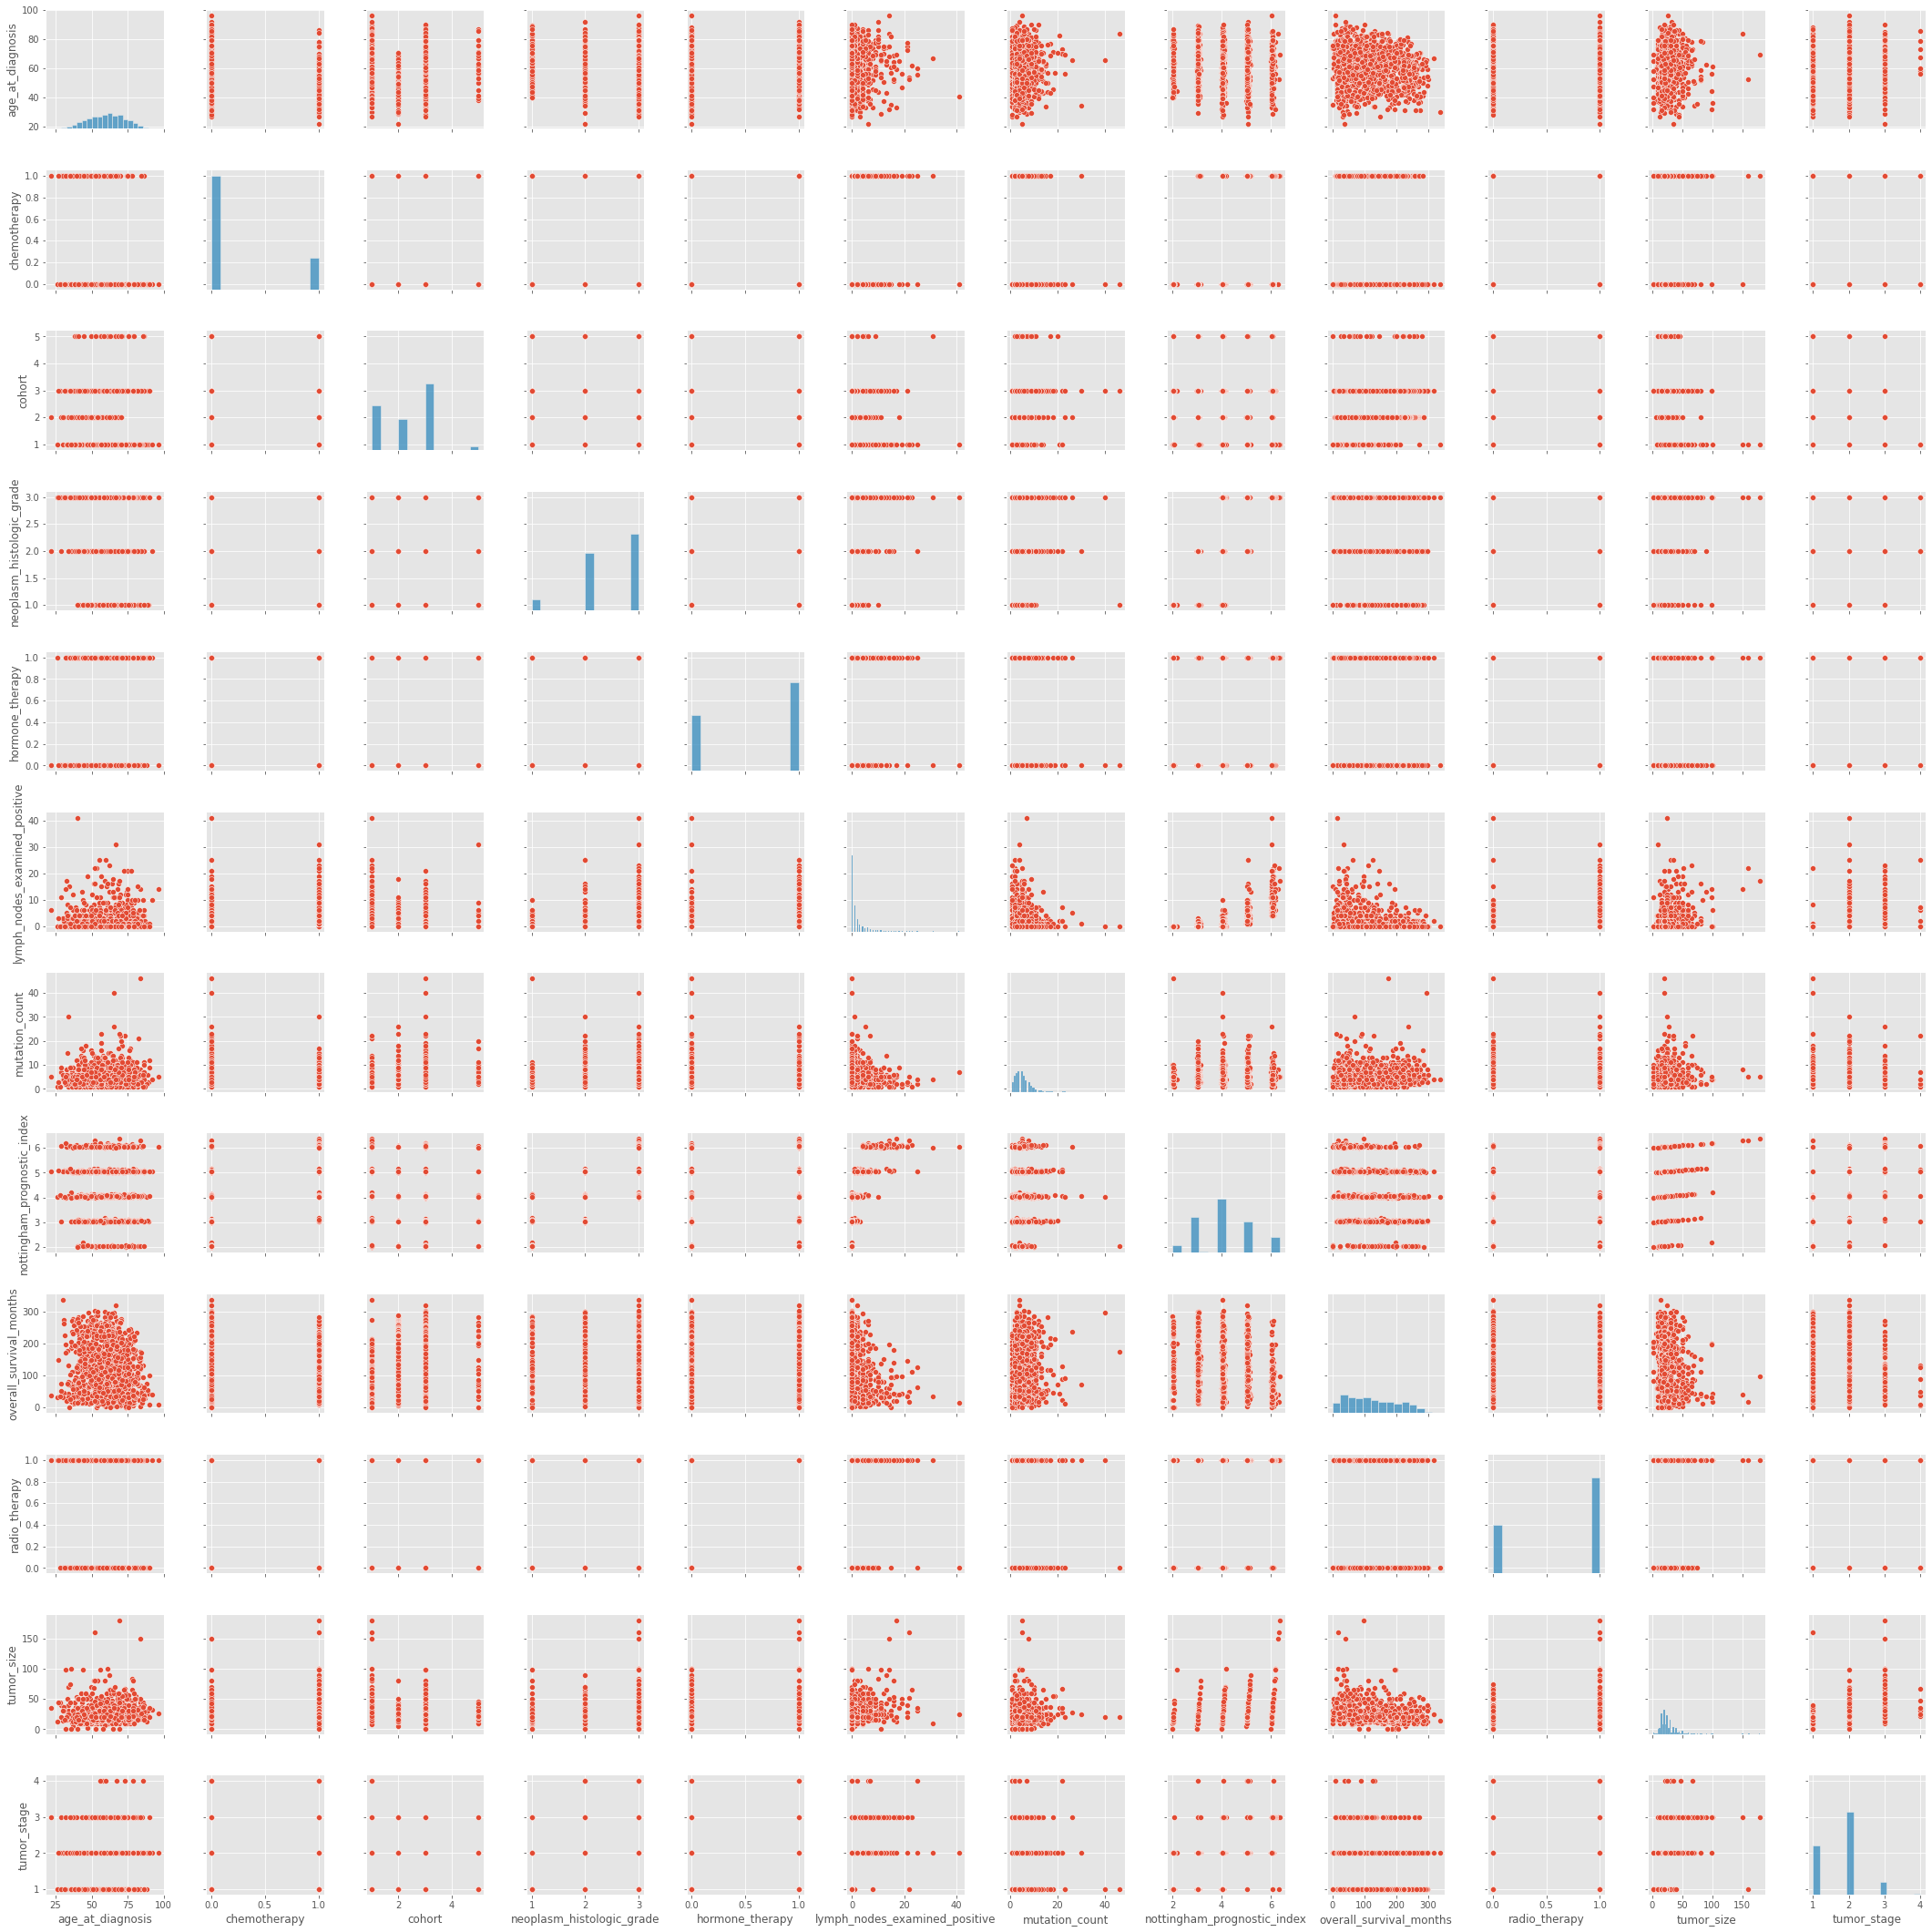

In [13]:
sns.pairplot(clinical_df)

We plot some charts above for clinical dataset. the  charts on diagonal shows histogram for each feature. the non-diagonal charts either shows the correlation between two features, or plot some king of histogram(between a categorical and a numerical feature.)


In [14]:
# here we transform categorical features to numerical features.
# this process is neccessary to use datasets in our learning models.
ord_enc = OrdinalEncoder()
clinical_df["type_of_breast_surgery"] = ord_enc.fit_transform(clinical_df[["type_of_breast_surgery"]])
clinical_df["cancer_type_detailed"] = ord_enc.fit_transform(clinical_df[["cancer_type_detailed"]])
clinical_df["cellularity"] = ord_enc.fit_transform(clinical_df[["cellularity"]])
clinical_df["pam50_+_claudin-low_subtype"] = ord_enc.fit_transform(clinical_df[["pam50_+_claudin-low_subtype"]])
clinical_df["er_status"] = ord_enc.fit_transform(clinical_df[["er_status"]])
clinical_df["her2_status"] = ord_enc.fit_transform(clinical_df[["her2_status"]])
clinical_df["tumor_other_histologic_subtype"] = ord_enc.fit_transform(clinical_df[["tumor_other_histologic_subtype"]])
clinical_df["inferred_menopausal_state"] = ord_enc.fit_transform(clinical_df[["inferred_menopausal_state"]])
clinical_df["integrative_cluster"] = ord_enc.fit_transform(clinical_df[["integrative_cluster"]])
clinical_df["primary_tumor_laterality"] = ord_enc.fit_transform(clinical_df[["primary_tumor_laterality"]])
clinical_df["oncotree_code"] = ord_enc.fit_transform(clinical_df[["oncotree_code"]])
clinical_df["pr_status"] = ord_enc.fit_transform(clinical_df[["pr_status"]])
clinical_df["3-gene_classifier_subtype"] = ord_enc.fit_transform(clinical_df[["3-gene_classifier_subtype"]])



## Dimension Reduction (20 + Up to 10 Points Optional)

For each dataset, investigate whether it is needed to use a dimensionality reduction approach or not. If yes, please reduce the dataset's dimension. You can use UMAP for this purpose but any other approach is acceptable. Finding the most important features contains extra points.

In [15]:
# TODO

print('it is not needed to use dimensionality reduction for clinical_df. \n \
because it contains several categorical features which cannot be reduced to lower dimensions.\n \
We just use dimensionality reduction for gene expression data. (notice it was\n  \
mentioned that gene mutation dataframe will not be used in these steps.' )


it is not needed to use dimensionality reduction for clinical_df. 
 because it contains several categorical features which cannot be reduced to lower dimensions.
 We just use dimensionality reduction for gene expression data. (notice it was
  mentioned that gene mutation dataframe will not be used in these steps.


In [16]:
# PCA

def extract_n_most_imporatant_features(features , n , df):
  import operator
  row1 = features[0 , :]
  row2 = features[1, : ]
  indexed1 = list(enumerate(row1))
  indexed2 = list(enumerate(row2))
  top1 = sorted(indexed1, key=operator.itemgetter(1) , reverse=True)[:n]
  top2 = sorted(indexed2, key=operator.itemgetter(1) , reverse=True)[:n]
  res1 = [(df.columns[x] , y) for (x,y) in top1]
  res2 = [(df.columns[x] , y) for (x,y) in top2]

  return top1 , top2 , res1 , res2
  pass


# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# principalComponents_breast = pca.fit_transform(expression_df)
# principal_breast_Df = pd.DataFrame(data = principalComponents_breast
#              , columns = ['principal component 1', 'principal component 2'])


from sklearn.decomposition import PCA
pca = PCA()
principalComponents_breast = pca.fit_transform(expression_df)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast)
cols = ['pc'+ str(x) for x in range(1 , principal_breast_Df.shape[1]+1)]
principal_breast_Df.columns = cols

# st = 'Explained variation per principal component: {}'.format(pca.explained_variance_ratio_).join
st = '\n'.join('PC{}: {}'.format(*k) for k in enumerate(pca.explained_variance_ratio_))

print(Fore.LIGHTRED_EX +  'Explained variation per principal component:' + Fore.RESET)
print( st)



fi = abs( pca.components_)

n = 5
top1 , top2 , res1 , res2 = extract_n_most_imporatant_features(fi , n , expression_df)

print(Fore.LIGHTBLUE_EX + '{} Features having most effect on PC1: {}'.format(n , res1) + Fore.RESET)
print(Fore.LIGHTBLUE_EX + '{} Features having most effect on PC2: {}'.format(n, res2) + Fore.RESET)


Explained variation per principal component:
PC0: 0.08260084953594082
PC1: 0.0737585881287576
PC2: 0.05891609248689252
PC3: 0.03745524612468765
PC4: 0.02983707220352398
PC5: 0.022673718909235946
PC6: 0.019664114562044133
PC7: 0.019267811339090377
PC8: 0.017928323726325676
PC9: 0.014963082922061229
PC10: 0.014407758868512765
PC11: 0.011428337779423377
PC12: 0.010918763875341145
PC13: 0.009647474477235183
PC14: 0.009361854742816603
PC15: 0.008243506045398339
PC16: 0.007578673229828369
PC17: 0.007443126114517529
PC18: 0.007346828404044487
PC19: 0.007153739898076442
PC20: 0.006932147112542958
PC21: 0.006778702053829086
PC22: 0.006235236248256033
PC23: 0.0061336443076900025
PC24: 0.00593233974219176
PC25: 0.005689985564848229
PC26: 0.005525572062004203
PC27: 0.005435724787662453
PC28: 0.005331182903094674
PC29: 0.005125722319300072
PC30: 0.0050140900240504315
PC31: 0.004783768757561552
PC32: 0.004722867643985446
PC33: 0.004632043842166832
PC34: 0.004609796012769625
PC35: 0.00451281209426657

In [17]:
principal_breast_Df

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0    -0.632853  0.015544 -1.002180  0.415576 -0.175468  0.120039  0.130499   
1     0.544289  0.288811 -1.286008 -0.581063  0.081058 -0.634721  0.109093   
2    -0.018887 -0.356279 -0.697519  0.453066 -0.839333 -0.217018  0.306355   
3    -0.405149  1.198018 -1.179755  0.016810  0.318235  0.370367 -0.482212   
4    -0.308832  1.093575 -0.713385  0.550532  0.432571 -0.268609  1.520560   
...        ...       ...       ...       ...       ...       ...       ...   
1088 -1.012517 -0.422095 -0.199525 -0.602768 -0.490318  0.236933  0.354702   
1089 -0.549848 -0.294199  0.396653 -0.877855 -0.565590  0.280330 -0.070350   
1090  1.769696  0.004247  0.138137 -1.138899 -0.234743  1.006009 -0.441733   
1091 -0.544736 -0.110962  0.487796 -0.761772 -0.286132  0.540490 -0.263040   
1092 -0.361502  1.262240  0.464004  0.489194 -0.202743 -0.356773  0.209478   

           pc8       pc9      pc10  ...     pc480     pc481     pc482  \
0    -0.265043 -0.210640  0.456023  ... -0.005547 -0.032282  0.006705   
1    -0.461043 -0.342114  0.332322  ...  0.023282 -0.008813 -0.026939   
2    -0.349854 -0.441642 -0.297290  ... -0.030424 -0.002016  0.010634   
3     0.208549 -0.181129  0.157416  ...  0.016921  0.030395 -0.007466   
4     0.193298  0.135852  0.128913  ... -0.025423 -0.020936 -0.006749   
...        ...       ...       ...  ...       ...       ...       ...   
1088  0.239145  0.354221 -0.315704  ...  0.006142  0.034283  0.013878   
1089  0.030147  0.374170 -0.330341  ...  0.036882  0.012254  0.021486   
1090 -0.681114 -0.000051 -0.180307  ...  0.000964  0.024908  0.026265   
1091  0.029083  0.042908 -0.224203  ...  0.009586 -0.033511 -0.014286   
1092 -0.174969  0.388616 -0.407111  ... -0.016455 -0.017038 -0.044482   

         pc483     pc484     pc485     pc486     pc487     pc488     pc489  
0    -0.009234 -0.005310  0.018891 -0.010057  0.022387 -0.011524  0.031321  
1    -0.003946 -0.004238  0.025934 -0.015808 -0.034190 -0.020859  0.020111  
2     0.001611 -0.010550  0.011018  0.022401  0.005231 -0.011258 -0.020626  
3    -0.033917  0.027711 -0.016568  0.054403  0.020824  0.032899 -0.005171  
4     0.039403 -0.003937 -0.058184  0.010452 -0.048387 -0.060021 -0.003210  
...        ...       ...       ...       ...       ...       ...       ...  
1088 -0.007269  0.033803 -0.029318  0.057232 -0.010987 -0.017117  0.004176  
1089 -0.018116 -0.032550  0.012918  0.018663 -0.052811 -0.025640  0.002047  
1090  0.004163 -0.001033 -0.032019 -0.020007 -0.002119  0.004797  0.002750  
1091  0.015391  0.025225  0.026515  0.017535 -0.039278 -0.005733  0.028340  
1092  0.022408 -0.000388 -0.011545 -0.006016 -0.015556  0.014919  0.026463  

[1093 rows x 489 columns]

1       False
4        True
5        True
8        True
9        True
        ...  
1618     True
1619    False
1621     True
1623    False
1664    False
Name: overall_survival, Length: 1093, dtype: bool


<Figure size 432x288 with 0 Axes>

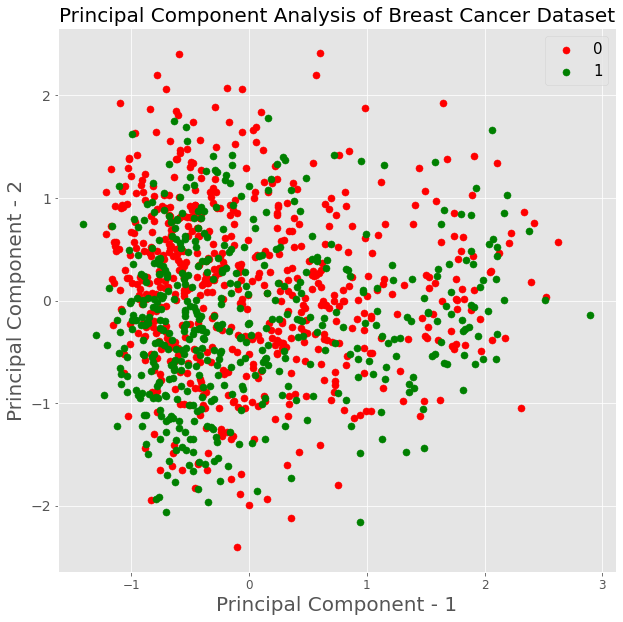

In [18]:

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
print((label == targets[0]))
# principal_breast_Df
for target, color in zip(targets,colors):
    indicesToKeep = list(label == target)
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'pc1']
               , principal_breast_Df.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [19]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
!pip install datashader

!pip install bokeh

!pip install holoviews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:

from umap import UMAP
import umap.plot

reducer = UMAP()
embedding = reducer.fit(expression_df)
reduced_expression_df = reducer.fit_transform(expression_df)

In [22]:
reduced_expression_df.shape

(1093, 2)

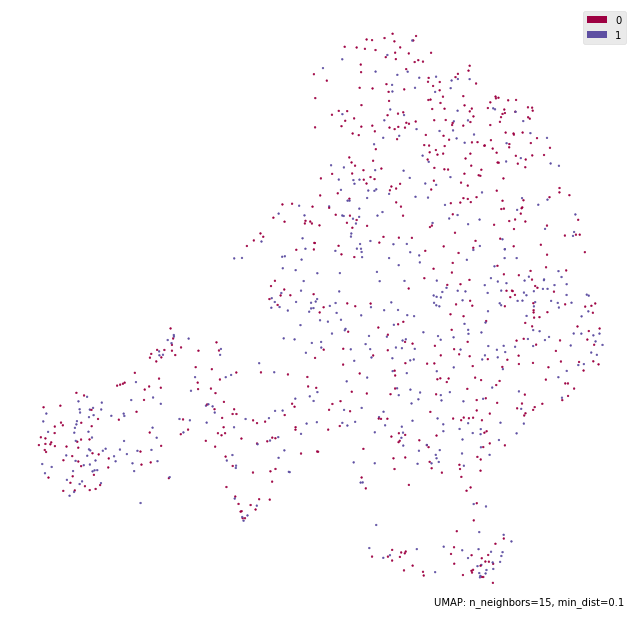

In [23]:
umap.plot.points(embedding, labels=label)

In [24]:
from matplotlib.pyplot import figure

pd.set_option('display.max_rows',20)
rf = RandomForestClassifier(n_estimators=100, max_depth=3,
                                 bootstrap=True, n_jobs=-1,
                                 random_state=0)
rf.fit(expression_df, label)

feature_imp = pd.Series(rf.feature_importances_, 
                        index=expression_df.columns).sort_values(ascending=False)

figure(figsize=(60,60), dpi=300)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title("Visualizing Important Features", fontsize=15, pad=15)
print('Feature importances: \n', feature_imp.head(20))

Feature importances: 
 hsd17b11    0.029972
cdkn2c      0.029704
casp8       0.024594
rheb        0.022015
stat5a      0.020501
ncoa3       0.019571
tgfbr2      0.019028
lama2       0.017832
myc         0.012775
ccnb1       0.011754
tnk2        0.011354
arid5b      0.010931
diras3      0.010883
abcb1       0.010736
tgfb3       0.010190
tsc2        0.009819
pdgfra      0.009699
kit         0.009673
ar          0.009636
jak1        0.009410
dtype: float64


# Classic Model (25 Points)

In this section, you must implement a classic classification model for clinical, gene expressions, and reduced gene expressions datasets. Using Random Forest is suggested. (minimum acceptable accuracy = 60%)

In [35]:
pca = PCA(n_components = 2)
principalComponents_breast = pca.fit_transform(expression_df)
reduced_expression_df = pd.DataFrame(data = principalComponents_breast)

In [36]:
# train test split

print(clinical_df.shape)
print(label.shape)

# reduced_expression_train
from sklearn.preprocessing import normalize

clinical_train, clinical_test, y_train, y_test = train_test_split(clinical_df, label, test_size=0.2, random_state=42)
expression_train, expression_test, expression_train_y, expression_test_y = train_test_split(expression_df, label, test_size=0.2, random_state=42)
reduced_expression_train, reduced_expression_test, reduced_expression_train_y, reduced_expression_test_y = train_test_split(reduced_expression_df, label, test_size=0.2, random_state=42)

(1093, 25)
(1093,)


In [37]:
# clinical_train
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error , classification_report


In [38]:
clf=RandomForestClassifier(max_depth=2 , n_estimators = 200, random_state = 42)
clf.fit(clinical_train, y_train)

predictions = clf.predict(clinical_test)

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.80      0.82      0.81       128
           1       0.74      0.70      0.72        91

    accuracy                           0.77       219
   macro avg       0.77      0.76      0.76       219
weighted avg       0.77      0.77      0.77       219



In [39]:

rf = RandomForestClassifier(max_depth=2 , n_estimators = 200, random_state = 42)

rf.fit(expression_train, expression_train_y);


predictions = rf.predict(expression_test)


print(classification_report(expression_test_y, predictions))



              precision    recall  f1-score   support

           0       0.64      0.92      0.76       128
           1       0.72      0.29      0.41        91

    accuracy                           0.66       219
   macro avg       0.68      0.60      0.58       219
weighted avg       0.68      0.66      0.61       219



In [40]:
rf = RandomForestClassifier(max_depth=2 , n_estimators = 200, random_state = 42)
rf.fit(reduced_expression_train, reduced_expression_train_y);

predictions = rf.predict(reduced_expression_test)

print(classification_report(reduced_expression_test_y, predictions))


              precision    recall  f1-score   support

           0       0.72      0.83      0.77       128
           1       0.69      0.55      0.61        91

    accuracy                           0.71       219
   macro avg       0.71      0.69      0.69       219
weighted avg       0.71      0.71      0.71       219



# Neural Network (30 Points)

In this section, you must implement a neural network model for clinical, gene expressions and reduced gene expressions datasets. Using the MPL models is suggested. (minimum acceptable accuracy = 60%)

In [41]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import keras


In [42]:
model = Sequential()
model.add(Dense(20, input_shape=(clinical_df.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt, 
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(clinical_train,
                    y_train,
                    epochs=20, # you can set this to a big number!
                    batch_size=5,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

pred = model.predict(clinical_test)
pred[pred > 0.5] = 1
pred[pred<= 0.5] = 0
# pred
print(classification_report(y_test, pred))

Epoch 1/20
140/140 [==============================] - 3s 12ms/step - loss: 0.9959 - accuracy: 0.6853 - val_loss: 0.5654 - val_accuracy: 0.7200
Epoch 2/20
140/140 [==============================] - 1s 10ms/step - loss: 0.5869 - accuracy: 0.6938 - val_loss: 0.5920 - val_accuracy: 0.6686
Epoch 3/20
140/140 [==============================] - 2s 17ms/step - loss: 0.5730 - accuracy: 0.7110 - val_loss: 0.5589 - val_accuracy: 0.7371
Epoch 4/20
140/140 [==============================] - 2s 13ms/step - loss: 0.5491 - accuracy: 0.7182 - val_loss: 0.5731 - val_accuracy: 0.6743
Epoch 5/20
140/140 [==============================] - 0s 3ms/step - loss: 0.5687 - accuracy: 0.7310 - val_loss: 0.5574 - val_accuracy: 0.7029
Epoch 6/20
140/140 [==============================] - 0s 3ms/step - loss: 0.5329 - accuracy: 0.7482 - val_loss: 0.5781 - val_accuracy: 0.7257
Epoch 7/20
140/140 [==============================] - 0s 3ms/step - loss: 0.5280 - accuracy: 0.7554 - val_loss: 0.5662 - val_accuracy: 0.6914
Ep

In [43]:
model = Sequential()
model.add(Dense(20, input_shape=(expression_df.shape[1],), activation='relu')) # Add an input shape! (features,)
# model.add(Dropout(.1))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, 
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(expression_train,
                    expression_train_y,
                    epochs=20, # you can set this to a big number!
                    batch_size=5,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

pred = model.predict(expression_test)
pred[pred > 0.5] = 1
pred[pred <= 0.5] = 0
print(classification_report(expression_test_y, pred))


Epoch 1/20
140/140 [==============================] - 1s 4ms/step - loss: 0.6971 - accuracy: 0.5365 - val_loss: 0.6735 - val_accuracy: 0.5714
Epoch 2/20
140/140 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5451 - val_loss: 0.6736 - val_accuracy: 0.6171
Epoch 3/20
140/140 [==============================] - 0s 3ms/step - loss: 0.6749 - accuracy: 0.5851 - val_loss: 0.6663 - val_accuracy: 0.5714
Epoch 4/20
140/140 [==============================] - 0s 3ms/step - loss: 0.6693 - accuracy: 0.5866 - val_loss: 0.6692 - val_accuracy: 0.6057
Epoch 5/20
140/140 [==============================] - 0s 3ms/step - loss: 0.6583 - accuracy: 0.6023 - val_loss: 0.6533 - val_accuracy: 0.6229
Epoch 6/20
140/140 [==============================] - 0s 3ms/step - loss: 0.6598 - accuracy: 0.6109 - val_loss: 0.6549 - val_accuracy: 0.6000
Epoch 7/20
140/140 [==============================] - 0s 3ms/step - loss: 0.6601 - accuracy: 0.5951 - val_loss: 0.6615 - val_accuracy: 0.5714
Epoch 

In [44]:
# model = Sequential()
# model.add(Dense(3, input_shape=(reduced_expression_train.shape[1],), activation='relu')) # Add an input shape! (features,)
# model.add(Dropout(.1))
# model.add(Dense(2, activation='relu'))
# # model.add(Dropout(.2))
# model.add(Dense(1, activation='sigmoid'))


model = Sequential()
model.add(Dense(20, input_shape=(reduced_expression_train.shape[1],), activation='relu')) # Add an input shape! (features,)
# model.add(Dropout(.1))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(reduced_expression_train,
                    reduced_expression_train_y,
                    epochs=20, # you can set this to a big number!
                    batch_size=5,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

pred = model.predict(reduced_expression_test)
pred[pred >= 0.5] = 1
pred[pred < 0.5] = 0
print(classification_report(reduced_expression_test_y, pred))

Epoch 1/20
140/140 [==============================] - 1s 3ms/step - loss: 0.6844 - accuracy: 0.5622 - val_loss: 0.6679 - val_accuracy: 0.6229
Epoch 2/20
140/140 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.6037 - val_loss: 0.6621 - val_accuracy: 0.6171
Epoch 3/20
140/140 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.5937 - val_loss: 0.6617 - val_accuracy: 0.5886
Epoch 4/20
140/140 [==============================] - 0s 3ms/step - loss: 0.6684 - accuracy: 0.5980 - val_loss: 0.6608 - val_accuracy: 0.5886
Epoch 5/20
140/140 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.6023 - val_loss: 0.6578 - val_accuracy: 0.6114
Epoch 6/20
140/140 [==============================] - 0s 2ms/step - loss: 0.6665 - accuracy: 0.5980 - val_loss: 0.6584 - val_accuracy: 0.6114
Epoch 7/20
140/140 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.5937 - val_loss: 0.6587 - val_accuracy: 0.6114
Epoch 

# Model Comparison (10 Points)

Compare different models and different datasets (clinical, gene expressions, and gene reduced expressions) and try to explain their differences.

Neural Network VS Random Forest :
1. Random Forest is less computationally expensive
2. Neural Networks will require much more data than Random forest does.
3. The neural network will simply decimate the interpretability of your features to the point where it becomes meaningless


In our datasets and our models:
1. Random Forest on clinical dataset has the highest accuracy among all (model, dataset) pairs.
2. The results of fitting models on clinical dataset are better than gene expression(GE) and reduced gene expression datasets(RGE).this is because there seems to be several columns in this dataset that has high correlation with target labels and so our model use these columns to learn features and then predict better on test set.
3. It seems that training models on GE hase better results than RGE dataset accoring to our accuracies on these datasets in our random forest and nn models.
We think that this is because in the proccess of dimensionality reduction, we compact information of different features in only 2 features and as we stated before, these 2 components just explain 15% of variability of data. so we have lost much information and this will result in worse results.

Altogether , Random forest has better results on clinical dataset than Neural network. but worse results on GE and RGE datasets.